# Ejercicio_Analítica Avanzada de datos con PySpark

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [4]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [5]:
data = spark.read.csv(
    '../data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [6]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [7]:
data = data.drop('market.cap')

In [8]:
data.filter("open is null").show()

+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
| _c0|symbol|      data|open|high| low|close|volume|adjusted|       sector|            industry|exchange|
+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
|4378|  KRKR|2020-05-11|NULL|NULL|NULL| NULL|  NULL|    NULL|Miscellaneous|   Business Services|  NASDAQ|
|5747|  NMTR|2020-01-23|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5748|  NMTR|2020-01-24|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5749|  NMTR|2020-01-27|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5750|  NMTR|2020-01-28|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5751|  NMTR|2020-01-29|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5752|  NMTR|2020-01-30|NULL|NULL|NULL| NULL| 

In [9]:
data.na.drop()

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, sector: string, industry: string, exchange: string]

In [10]:
from pyspark.sql.functions import col, min, max, avg, lit

data_transf = data.groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"),  

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 

      )

In [11]:
data_transf.toPandas()

,sector,From,To,Minimum Opening,Maximum Opening,Minimum Closing,Maximum Closing,Minimum Adjusted Closing,Maximum Adjusted Closing
0,Miscellaneous,2019-01-02,2020-07-22,0.147,1.059990e+03,0.1361,1.035830e+03,0.136100,1.035830e+03
1,Health Care,2019-01-02,2020-07-22,0.072,1.860000e+05,0.0710,1.870000e+05,0.071000,1.870000e+05
2,Public Utilities,2019-01-02,2020-07-22,0.331,2.800000e+02,0.3250,2.822200e+02,0.325000,2.806739e+02
3,Energy,2019-01-02,2020-07-22,0.100,9.050000e+02,0.0900,9.010400e+02,0.090000,8.790570e+02
4,Consumer Non-Durables,2019-01-02,2020-07-22,0.120,6.550000e+02,0.1200,6.641300e+02,0.120000,6.641300e+02
5,Finance,2019-01-02,2020-07-22,0.250,1.336930e+03,0.2700,1.341080e+03,0.270000,1.341080e+03
6,Basic Industries,2019-01-02,2020-07-22,0.230,1.601682e+08,0.2300,1.583766e+08,0.230000,1.572494e+08
7,Capital Goods,2019-01-02,2020-07-22,0.130,4.025000e+03,0.1200,4.037770e+03,-1.230099,4.037770e+03
8,Technology,2019-01-02,2020-07-22,0.140,2.704000e+03,0.1300,2.736000e+03,0.130000,2.736000e+03
9,Consumer Services,2019-01-02,2020-07-22,0.100,1.543750e+04,0.1340,1.984375e+04,0.134000,1.984375e+04


In [12]:
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Biotechnology: Biological Products (No Diagnos...,24.808083,24.803587,24.745080
3,Other Specialty Stores,84.807188,84.802766,84.555250
4,Biotechnology: Electromedical & Electrotherape...,33.368917,33.336119,33.210226
...,...,...,...,...
130,Wholesale Distributors,16.608839,16.602717,16.602717
131,Electronics Distribution,6.428699,6.430408,6.377569
132,Tools/Hardware,70.412755,70.475944,69.670351
133,Tobacco,32.467832,32.455689,32.213047


<Axes: >

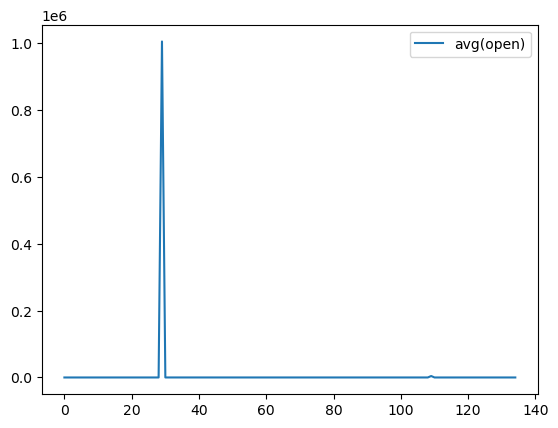

In [13]:
data_df[['industry', 'avg(open)']].plot()

In [14]:
import seaborn as sb
corr = data_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

ValueError: could not convert string to float: 'Finance/Investors Services'

In [15]:
# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')

Py4JJavaError: An error occurred while calling o115.save.
: java.lang.UnsatisfiedLinkError: 'boolean org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(java.lang.String, int)'
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:793)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1249)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1454)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:601)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.fs.ChecksumFileSystem.listStatus(ChecksumFileSystem.java:761)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.getAllCommittedTaskPaths(FileOutputCommitter.java:334)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.commitJobInternal(FileOutputCommitter.java:404)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.commitJob(FileOutputCommitter.java:377)
	at org.apache.parquet.hadoop.ParquetOutputCommitter.commitJob(ParquetOutputCommitter.java:48)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.commitJob(HadoopMapReduceCommitProtocol.scala:192)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$writeAndCommit$3(FileFormatWriter.scala:275)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.timeTakenMs(Utils.scala:552)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:275)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:388)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:361)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:240)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
